In [1]:

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:

df.shape

(10000, 3)

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [6]:
import seaborn as sns


<Axes: xlabel='Height', ylabel='Count'>

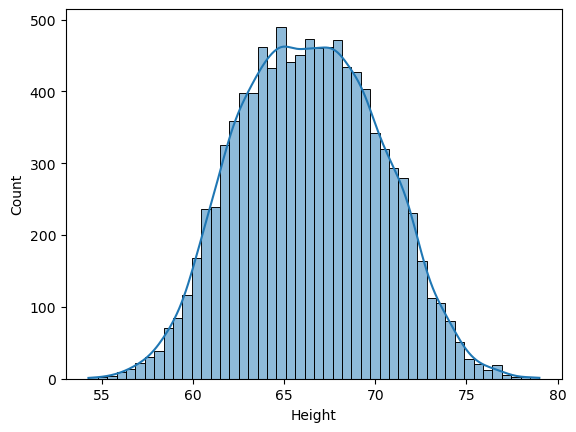

In [7]:
sns.histplot(df['Height'],kde=True)

<Axes: xlabel='Height'>

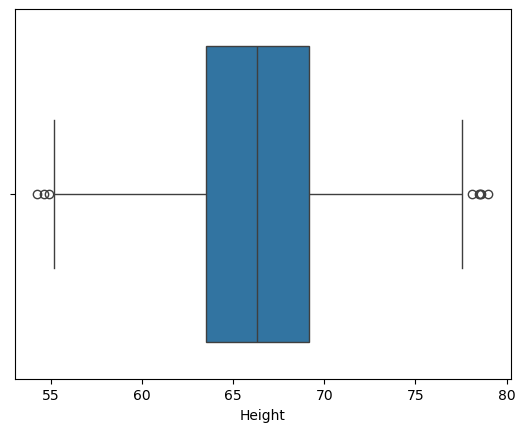

In [8]:
sns.boxplot(x='Height',data=df)

In [9]:
upperlimit=df['Height'].quantile(0.99)
lowerlimit=df['Height'].quantile(0.01)

In [10]:
upperlimit,lowerlimit

(np.float64(74.7857900583366), np.float64(58.13441158671655))

In [14]:
df[(df['Height'] >=74.78)|(df['Height'] <=58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [17]:
newdf=df[(df['Height'] <=74.78) &(df['Height'] >=58.13)]

In [18]:
newdf

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height'>

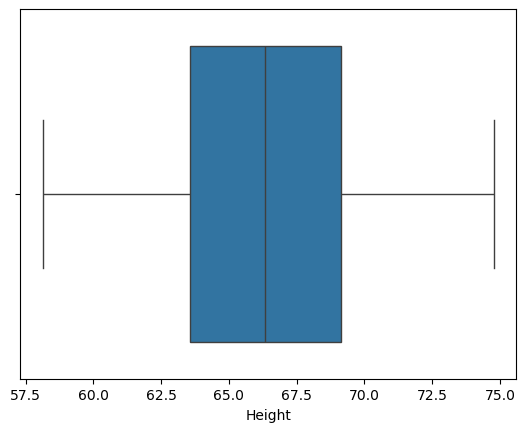

In [19]:
sns.boxplot(x='Height',data=newdf)

# Capping / Winsorization

In [24]:
df['Height']=np.where(df['Height'] >= upperlimit,
         upperlimit,
         np.where(df['Height']<= lowerlimit,
         lowerlimit,
                 df["Height"]
                 )
                     )
         
    

<Axes: xlabel='Height'>

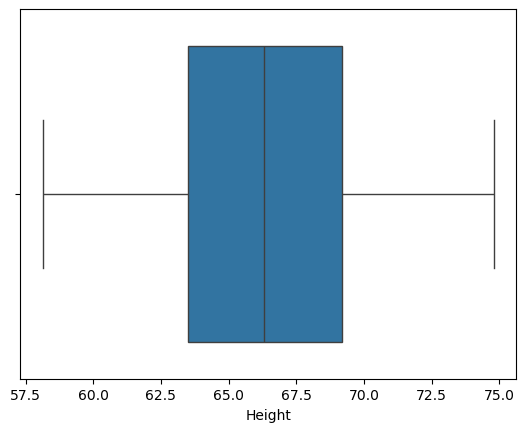

In [27]:
sns.boxplot(x='Height',data=df)